# Variations autour de l'algorithme ADAM

Notebook pour jouer avec l'algorithme d'optimisation ADAM. Je le mets en partage mais c'est très incomplet. 
ADAM : Adaptative Moment Estimatation

D'après l'article de Kingma et Ba, ADAM: A Method For Stochastic Optimization, 2014 (https://arxiv.org/pdf/1412.6980.pdf)


In [1]:
# Define objective function to work with
def objective(x, y):
    return x**2 + y**2

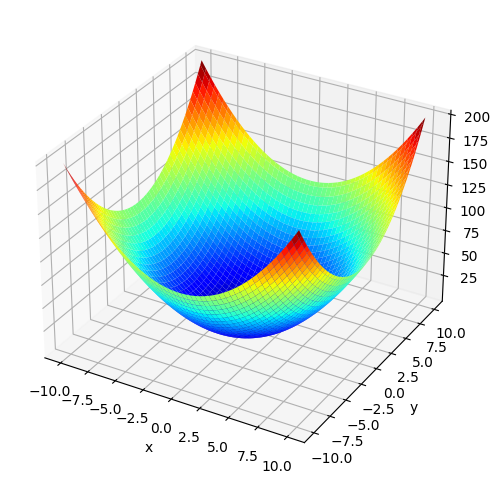

In [37]:
# Lets plot this function in 3D
# Create a meshgrid of points

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculate the objective function for each point on the grid
Z = objective(X, Y) 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


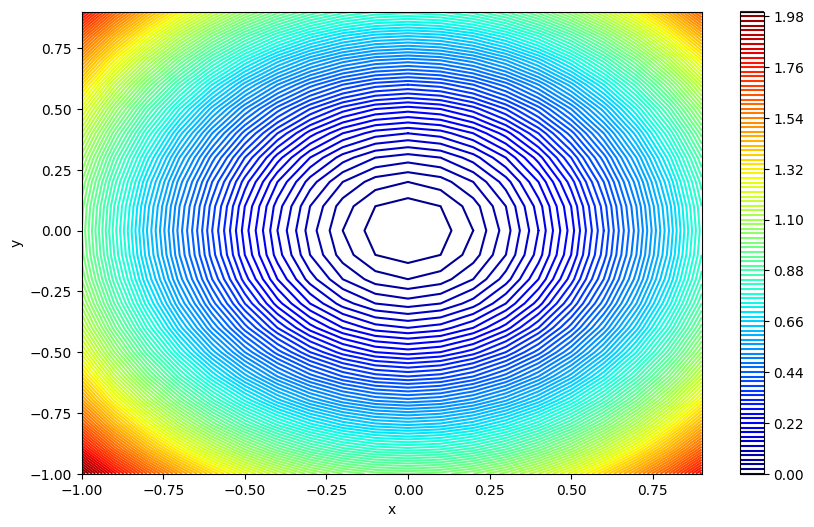

In [38]:
# Function to plot the objective function in 2D

# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)

X, Y = np.meshgrid(xaxis, yaxis)
Z = objective(X, Y)


def contour2D_function(X, Y, Z):
    

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, cmap='jet', levels=100)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()

    #plt.show()

contour2D_function(X, Y, Z)

## Comment se fait la mise à jour ? 

<center><img src="./images/ADAM_Algo_screenshot.png"></center>



$$m_t = \beta_1.m_{t-1} + (1-\beta_1)*g_t$$

$$v_t = \beta_2.v_{t-1} + (1-\beta_1)*g^2_t$$

$$\hat{m}_t = \frac{m_t}{1-\beta_1}$$
$$\hat{v}_t = \frac{v_t}{1-\beta_2}$$ 

$$x_t = x_{t-1} -\alpha\frac{\hat{m}_t}{(\sqrt{\hat{v}_t}+\epsilon)}$$


(100, 2)
Min: [0.07190831 0.07410563]
Max: [0.78154743 0.78956959]


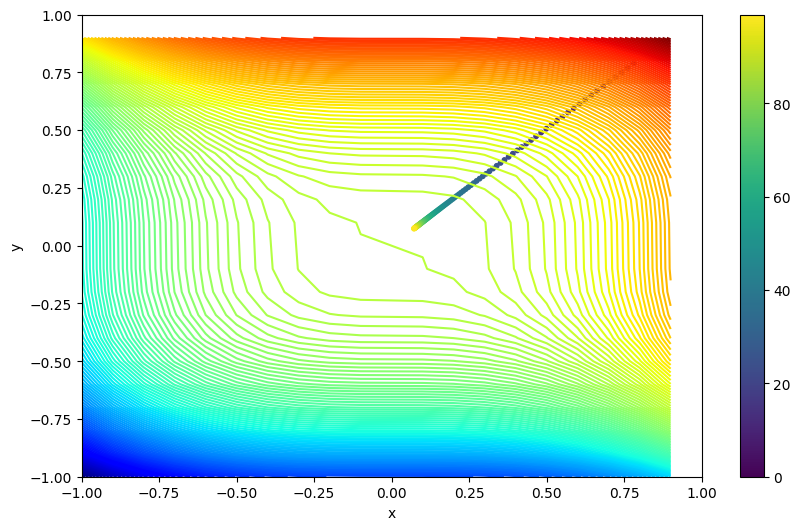

In [47]:
# Implementing the ADAM algorithm
# First estimate the derivative of the objective function


def objective(x, y):
    return x**3 + 2*y**3

def derivative(x, y):
    return np.asarray([3.0*x**2, 6.0*y**2])

def contour2D_function(X, Y, Z):   

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, cmap='jet', levels=100)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()

    #plt.show()

X, Y = np.meshgrid(xaxis, yaxis)
Z = objective(X, Y)


n_iterations = 100 # number of iterations
alpha = 0.02  # learning rate
beta1 = 0.9   # exponential decay rate for the first moment estimates
beta2 = 0.999 # exponential decay rate for the second moment estimates
epsilon = 1e-8 # small number to prevent division by zero


def adam(objective, derivative, bounds, n_iterations, beta1, beta2, epsilon=1e-8, verbose=True):
    solutions = list()
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    
    for t in range(n_iterations):
        g=derivative(x[0], x[1])
        for i in range(bounds.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            mhat = m[i] / (1.0 - beta1**(t+1))
            vhat = v[i] / (1.0 - beta2**(t+1))
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + epsilon)

        score = objective(x[0], x[1])
        solutions.append(x.copy())
        if verbose:
            print(f">iteration={t}, f({x})={score}")
    plt.show()
    return solutions

# Run the algorithm
solution = adam(objective, derivative, bounds, n_iterations, 
                beta1, beta2, epsilon, verbose=False)

#print('Best: %s, Score: %.3f' % (best, score))

# Plot the solution
solution = np.asarray(solution)
print(solution.shape)

# Print min and max values for each parameter
print('Min: %s' % (solution.min(axis=0)))
print('Max: %s' % (solution.max(axis=0)))

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, cmap='jet', levels=200)

# Plot the solution in gradient colors
plt.scatter(solution[:, 0], solution[:, 1],
            c=range(len(x)),
            cmap='viridis',
            s=10)

plt.xlabel('x')
plt.ylabel('y')
# Set limits for axis with respect to solution
plt.xlim(bounds[0, 0], bounds[0, 1])
plt.ylim(bounds[1, 0], bounds[1, 1])


plt.colorbar()
plt.show()


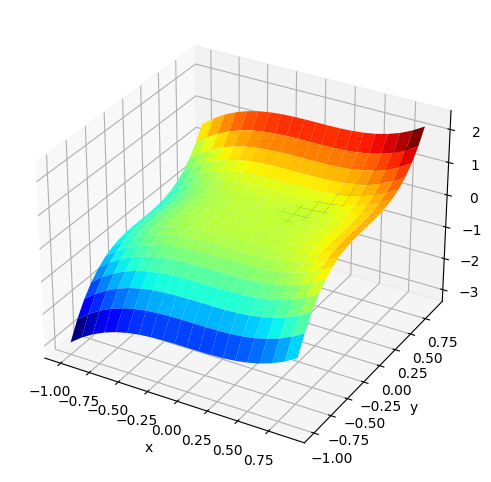

In [50]:
#  plot in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
ax.scatter(solution[:, 0], solution[:, 1], objective(solution[:, 0], solution[:, 1]),
           c=range(len(x)),
           cmap='viridis',
           s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

A suivre...